In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as plticker
from matplotlib import cm

In [3]:
def running_mean(x, N):
    x = np.nan_to_num(x)
    cumsum = np.cumsum(np.insert(x, 0, 0))
    running_mean = np.r_[cumsum[:N] / np.arange(1, N + 1),
                         (cumsum[N:] - cumsum[:-N]) / N]
    return running_mean

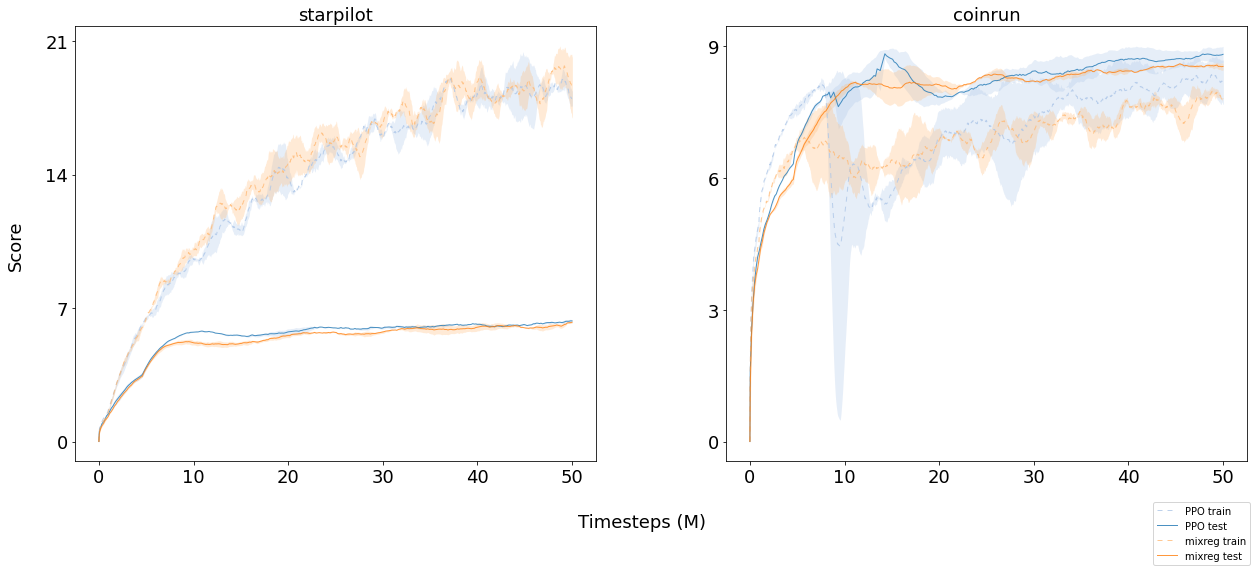

In [112]:
window = 30
games = [
    'starpilot',
    'coinrun'
]
stat = 'eprewmean'

cmap = plt.get_cmap("tab20")
ncols, nrows = 2, 1
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(21, 8))
fontsize = 18

for i, game in enumerate(games):
    # PPO
    train_rew = []
    test_rew = []
    
    for run in (1, 2):
        train = pd.read_csv(f'./procgen_exp/ppo/nobg/procgen/nomix/{game}/run_{run}/train.csv')
        test = pd.read_csv(f'./procgen_exp/ppo/nobg/procgen/nomix/{game}/run_{run}/test.csv')
        test_rew.append(running_mean(np.array(test[stat]), window))
        train_rew.append(running_mean(np.array(train[stat]), window))
    test_ind = np.array(test['misc/nupdates'])
    test_ind = np.insert(test_ind, 0, 0)
    train_mean = np.mean(train_rew, axis=0)
    train_std = np.std(train_rew, axis=0)
    test_mean = np.mean(test_rew, axis=0)
    test_std = np.std(test_rew, axis=0)
    x = np.linspace(0, len(train_mean), len(train_mean))
    axes[i % 4].plot(train_mean, color=cmap(1), linewidth=1, alpha=0.8, linestyle=(0, (5, 5)))
    axes[i % 4].fill_between(x, train_mean - train_std, train_mean + train_std,
                                     color=cmap(1), linewidth=0, alpha=0.3)
    x = np.linspace(0, len(test_mean), len(test_mean))
    axes[i % 4].plot(test_ind, test_mean, color=cmap(0), linewidth=1, alpha=0.8)
    axes[i % 4].fill_between(test_ind, test_mean - test_std, test_mean + test_std,
                                     color=cmap(1), linewidth=0, alpha=0.3)
    
    # mixreg
    train_rew = []
    test_rew = []
    for run in (1, 2):
        train = pd.read_csv(f'./procgen_exp/ppo/nobg/procgen/mixreg/{game}/run_{run}/train.csv')
        test = pd.read_csv(f'./procgen_exp/ppo/nobg/procgen/mixreg/{game}/run_{run}/test.csv')
        test_rew.append(running_mean(np.array(test[stat]), window))
        train_rew.append(running_mean(np.array(train[stat]), window))
    test_ind = np.array(test['misc/nupdates'])
    test_ind = np.insert(test_ind, 0, 0)
    train_mean = np.mean(train_rew, axis=0)
    train_std = np.std(train_rew, axis=0)
    test_mean = np.mean(test_rew, axis=0)
    test_std = np.std(test_rew, axis=0)
    x = np.linspace(0, len(train_mean), len(train_mean))
    axes[i % 4].plot(train_mean, color=cmap(3), linewidth=1, alpha=0.8, linestyle=(0, (5, 5)))
    axes[i % 4].fill_between(x, train_mean - train_std, train_mean + train_std,
                                     color=cmap(3), linewidth=0, alpha=0.3)
    x = np.linspace(0, len(test_mean), len(test_mean))
    axes[i % 4].plot(test_ind, test_mean, color=cmap(2), linewidth=1, alpha=0.8)
    axes[i % 4].fill_between(test_ind, test_mean - test_std, test_mean + test_std,
                                     color=cmap(3), linewidth=0, alpha=0.3)

    axes[i % 4].set_title(f'{game}', fontsize=fontsize)
    axes[i % 4].tick_params(axis='both', labelsize=fontsize)
    axes[i % 4].axes.set_xticks([0, 305, 610, 915, 1220, 1525])
    axes[i % 4].axes.set_xticklabels([0, 10, 20, 30,40, 50], fontsize=fontsize)
    ymin, ymax = axes[i % 4].get_ylim()
    loc = plticker.MultipleLocator(base=max(int((ymax - ymin) / 3), 3))
    axes[i % 4].yaxis.set_major_locator(loc)

fig.legend(loc='center', bbox_to_anchor=(0.87,0), labels=['PPO train', 'PPO test', 'mixreg train', 'mixreg test'])
fig.text(0.5, 0.01, 'Timesteps (M)', ha='center', fontsize=fontsize)
fig.text(0.08, 0.5, 'Score', va='center', rotation='vertical', fontsize=fontsize)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=0.15)
plt.savefig(f'./figs/nobg.png', bbox_inches='tight', transparent=True)

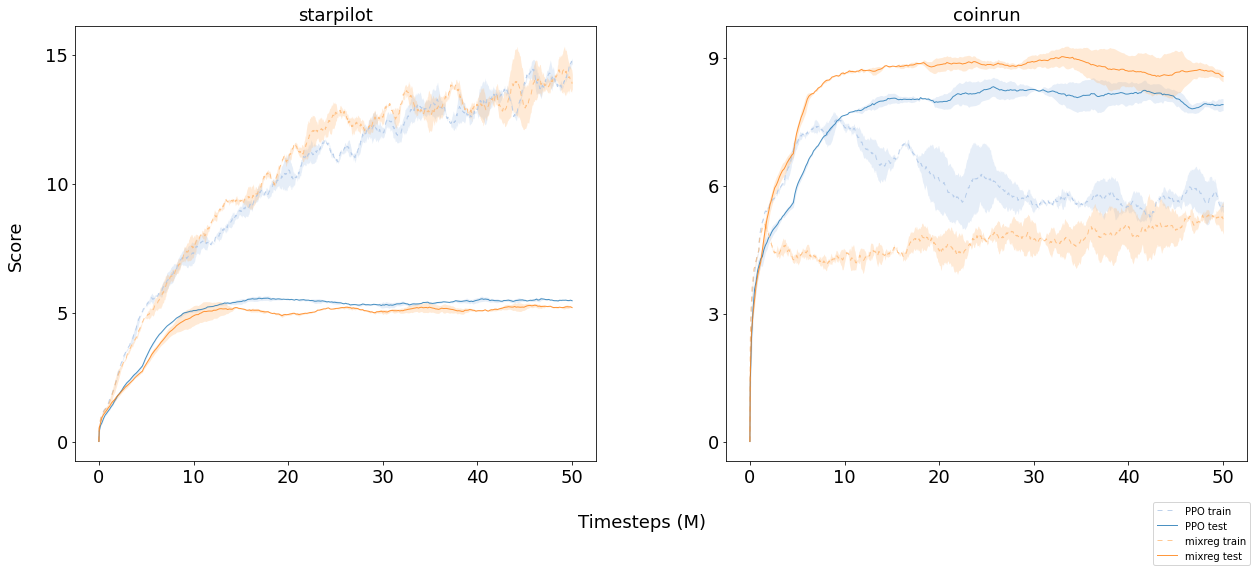

In [113]:
window = 30
games = [
    'starpilot',
    'coinrun'
]
stat = 'eprewmean'

cmap = plt.get_cmap("tab20")
ncols, nrows = 2, 1
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(21, 8))
fontsize = 18

for i, game in enumerate(games):
    # PPO
    train_rew = []
    test_rew = []
    
    for run in (1, 2):
        train = pd.read_csv(f'./procgen_exp/ppo/restrict_theme/procgen/nomix/{game}/run_{run}/train.csv')
        test = pd.read_csv(f'./procgen_exp/ppo/restrict_theme/procgen/nomix/{game}/run_{run}/test.csv')
        test_rew.append(running_mean(np.array(test[stat]), window))
        train_rew.append(running_mean(np.array(train[stat]), window))
    test_ind = np.array(test['misc/nupdates'])
    test_ind = np.insert(test_ind, 0, 0)
    train_mean = np.mean(train_rew, axis=0)
    train_std = np.std(train_rew, axis=0)
    test_mean = np.mean(test_rew, axis=0)
    test_std = np.std(test_rew, axis=0)
    x = np.linspace(0, len(train_mean), len(train_mean))
    axes[i % 4].plot(train_mean, color=cmap(1), linewidth=1, alpha=0.8, linestyle=(0, (5, 5)))
    axes[i % 4].fill_between(x, train_mean - train_std, train_mean + train_std,
                                     color=cmap(1), linewidth=0, alpha=0.3)
    x = np.linspace(0, len(test_mean), len(test_mean))
    axes[i % 4].plot(test_ind, test_mean, color=cmap(0), linewidth=1, alpha=0.8)
    axes[i % 4].fill_between(test_ind, test_mean - test_std, test_mean + test_std,
                                     color=cmap(1), linewidth=0, alpha=0.3)
    
    # mixreg
    train_rew = []
    test_rew = []
    for run in (1, 2):
        train = pd.read_csv(f'./procgen_exp/ppo/restrict_theme/procgen/mixreg/{game}/run_{run}/train.csv')
        test = pd.read_csv(f'./procgen_exp/ppo/restrict_theme/procgen/mixreg/{game}/run_{run}/test.csv')
        test_rew.append(running_mean(np.array(test[stat]), window))
        train_rew.append(running_mean(np.array(train[stat]), window))
    test_ind = np.array(test['misc/nupdates'])
    test_ind = np.insert(test_ind, 0, 0)
    train_mean = np.mean(train_rew, axis=0)
    train_std = np.std(train_rew, axis=0)
    test_mean = np.mean(test_rew, axis=0)
    test_std = np.std(test_rew, axis=0)
    x = np.linspace(0, len(train_mean), len(train_mean))
    axes[i % 4].plot(train_mean, color=cmap(3), linewidth=1, alpha=0.8, linestyle=(0, (5, 5)))
    axes[i % 4].fill_between(x, train_mean - train_std, train_mean + train_std,
                                     color=cmap(3), linewidth=0, alpha=0.3)
    x = np.linspace(0, len(test_mean), len(test_mean))
    axes[i % 4].plot(test_ind, test_mean, color=cmap(2), linewidth=1, alpha=0.8)
    axes[i % 4].fill_between(test_ind, test_mean - test_std, test_mean + test_std,
                                     color=cmap(3), linewidth=0, alpha=0.3)

    axes[i % 4].set_title(f'{game}', fontsize=fontsize)
    axes[i % 4].tick_params(axis='both', labelsize=fontsize)
    axes[i % 4].axes.set_xticks([0, 305, 610, 915, 1220, 1525])
    axes[i % 4].axes.set_xticklabels([0, 10, 20, 30,40, 50], fontsize=fontsize)
    ymin, ymax = axes[i % 4].get_ylim()
    loc = plticker.MultipleLocator(base=max(int((ymax - ymin) / 3), 3))
    axes[i % 4].yaxis.set_major_locator(loc)

fig.legend(loc='center', bbox_to_anchor=(0.87,0), labels=['PPO train', 'PPO test', 'mixreg train', 'mixreg test'])
fig.text(0.5, 0.01, 'Timesteps (M)', ha='center', fontsize=fontsize)
fig.text(0.08, 0.5, 'Score', va='center', rotation='vertical', fontsize=fontsize)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=0.15)
plt.savefig(f'./figs/restrict_theme.png', bbox_inches='tight', transparent=True)

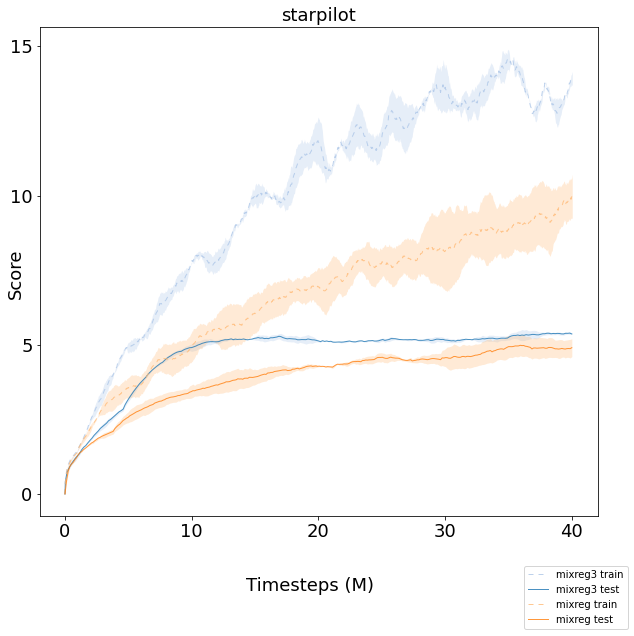

In [140]:
window = 30
games = [
    'starpilot',
]
stat = 'eprewmean'

cmap = plt.get_cmap("tab20")
ncols, nrows = 1, 1
fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(10, 9))
fontsize = 18

for i, game in enumerate(games):
    # mixreg3
    train_rew = []
    test_rew = []
    
    for run in (1, 2):
        train = pd.read_csv(f'./procgen_exp/ppo/procgen/mixreg3/{game}/run_{run}/train.csv')
        test = pd.read_csv(f'./procgen_exp/ppo/procgen/mixreg3/{game}/run_{run}/test.csv')
        test_rew.append(running_mean(np.array(test[stat]), window))
        train_rew.append(running_mean(np.array(train[stat]), window))
    test_ind = np.array(test['misc/nupdates'])
    test_ind = np.insert(test_ind, 0, 0)
    train_mean = np.mean(train_rew, axis=0)
    train_std = np.std(train_rew, axis=0)
    test_mean = np.mean(test_rew, axis=0)
    test_std = np.std(test_rew, axis=0)
    x = np.linspace(0, len(train_mean), len(train_mean))
    axes.plot(train_mean, color=cmap(1), linewidth=1, alpha=0.8, linestyle=(0, (5, 5)))
    axes.fill_between(x, train_mean - train_std, train_mean + train_std,
                                     color=cmap(1), linewidth=0, alpha=0.3)
    x = np.linspace(0, len(test_mean), len(test_mean))
    axes.plot(test_ind, test_mean, color=cmap(0), linewidth=1, alpha=0.8)
    axes.fill_between(test_ind, test_mean - test_std, test_mean + test_std,
                                     color=cmap(1), linewidth=0, alpha=0.3)
    
    # mixreg
    train_rew = []
    test_rew = []
    for run in [1, 3]:
        train = pd.read_csv(f'./procgen_exp/ppo/procgen/mixreg/{game}/run_{run}/train.csv')
        test = pd.read_csv(f'./procgen_exp/ppo/procgen/mixreg/{game}/run_{run}/test.csv')
        test_rew.append(running_mean(np.array(test[stat]), window))
        train_rew.append(running_mean(np.array(train[stat]), window))
    test_ind = np.array(test['misc/nupdates'])
    test_ind = np.insert(test_ind, 0, 0)
    train_mean = np.mean(train_rew, axis=0)
    train_std = np.std(train_rew, axis=0)
    test_mean = np.mean(test_rew, axis=0)
    test_std = np.std(test_rew, axis=0)
    x = np.linspace(0, len(train_mean), len(train_mean))
    axes.plot(train_mean, color=cmap(3), linewidth=1, alpha=0.8, linestyle=(0, (5, 5)))
    axes.fill_between(x, train_mean - train_std, train_mean + train_std,
                                     color=cmap(3), linewidth=0, alpha=0.3)
    x = np.linspace(0, len(test_mean), len(test_mean))
    axes.plot(test_ind, test_mean, color=cmap(2), linewidth=1, alpha=0.8)
    axes.fill_between(test_ind, test_mean - test_std, test_mean + test_std,
                                     color=cmap(3), linewidth=0, alpha=0.3)

    axes.set_title(f'{game}', fontsize=fontsize)
    axes.tick_params(axis='both', labelsize=fontsize)
    axes.axes.set_xticks([0, 305, 610, 915, 1220])
    axes.axes.set_xticklabels([0, 10, 20, 30, 40], fontsize=fontsize)
    ymin, ymax = axes.get_ylim()
    loc = plticker.MultipleLocator(base=max(int((ymax - ymin) / 3), 3))
    axes.yaxis.set_major_locator(loc)

fig.legend(loc='center', bbox_to_anchor=(0.87,0), labels=['mixreg3 train', 'mixreg3 test', 'mixreg train', 'mixreg test'])
fig.text(0.5, 0.01, 'Timesteps (M)', ha='center', fontsize=fontsize)
fig.text(0.08, 0.5, 'Score', va='center', rotation='vertical', fontsize=fontsize)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=0.15)
plt.savefig(f'./figs/mixreg3.png', bbox_inches='tight', transparent=True)